# Cleaning

In [1]:
import pandas as pd
from nltk.corpus import stopwords


def filterByNumWords(df: pd.DataFrame, numWords: int) -> pd.DataFrame:
    """
    Filter out comments that have fewer words than numWords

    :param df: dataframe
    :param numWords: int
    :return: dataframe with comments with fewer words than numWords filtered out
    """

    if "comment_text_words" not in df.columns:
        df = splitIntoWords(df)

    return df.loc[df["comment_text_words"].str.len() > numWords]


def filterNonEnglishChars(df: pd.DataFrame) -> pd.DataFrame:
    """
        Filter out non-english characters

        :param df: dataframe
        :return: dataframe with non-english characters filtered out
    """

    # df["comment_text"] = df['comment_text'].str \
    #     .encode('ascii', 'ignore').str.decode('ascii')
    df["comment_text"].replace(r"[^A-Za-z\s]+", "", regex=True,
                               inplace=True)

    return df


def removeStopWords(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remove stop words

    :param df: dataframe
    :return: dataframe with stop words removed
    """

    wordsToRemove = stopwords.words('english')
    pattern = r"\b({})\b".format('|'.join(wordsToRemove))
    df["comment_text"] = df["comment_text"].str.replace(
        pattern, "", regex=True)

    return df


def toLowerCase(df: pd.DataFrame) -> pd.DataFrame:
    """
    Forces all characters to be lowercase

    :param df: dataframe
    :return: dataframe with all characters forced to be lowercase
    """

    df["comment_text"] = df["comment_text"].str.lower()

    return df


def splitIntoWords(df: pd.DataFrame) -> pd.DataFrame:
    """
    Split comments into words and forces them to be lowercase

    :param df: dataframe
    :return: dataframe with comments split into words
    """

    df["comment_text_words"] = df["comment_text"].str.split("\\s+")

    return df


def isEnglish(s: str) -> bool:
    """
    Check if a string contains all english characters

    :param s: string to check
    :return: whether string contains only english characters
    """

    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True


def trimWhitespace(df: pd.DataFrame) -> pd.DataFrame:
    df["comment_text"] = df["comment_text"].str.strip()

    return df

In [4]:
import nltk
nltk.download('stopwords')

def cleanData():
    df = pd.read_csv("train.csv")
    df = toLowerCase(df)
    df = filterNonEnglishChars(df)
    df = removeStopWords(df)
    df = trimWhitespace(df)
    df = splitIntoWords(df)
    df = filterByNumWords(df, 3)

    df.to_csv("train_cleaned.csv", index=False)

cleanData()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv("train.csv")

data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Exploring

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter


def graphBasedOnNumWords(df: pd.DataFrame) -> None:
    """
    Graphs the number of words in each comment.
    :param df: The Pandas DataFrame.
    :return: None.
    """
    df["num_words"] = df["comment_text"].apply(lambda x: len(x.split()))
    df["num_words"].hist(bins=30, range=(0, 300),
                         weights=np.ones(len(df)) / len(df))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
    plt.title("Number of Words in Each Comment")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Comments")
    plt.show()
    plt.close()
    print(df["num_words"].describe())


def getFrequencyOfWords(df: pd.DataFrame) -> None:
    """
    Gets the frequency of words in all comment.
    :param df: The Pandas DataFrame.
    :return: None.
    """
    print(pd.Series(" ".join(df["comment_text"]).split()).value_counts()[:20])


def getFrequencyOfToxicWords(df: pd.DataFrame) -> None:
    """
    Gets the frequency of words in all comment.
    :param df: The Pandas DataFrame.
    :return: None.
    """

    # Toxicity types to filter by
    toxicValues = ["toxic", "severe_toxic", "obscene", "threat", "insult",
                   "identity_hate"]
    # toxicValues = ["identity_hate"]

    # Number of toxicity types
    numToxicTypes = 1
    # numToxicTypes = 6

    filteredDf = df.loc[df[toxicValues].sum(axis=1) >= numToxicTypes]

    print(pd.Series(" ".join(filteredDf["comment_text"]).split())
          .value_counts()[:20])
    
def getFrequencyOfEachToxicTag(df: pd.DataFrame) -> None:
    """
    For each of the 6 toxicity tags, it finds the number of rows
    in the pandas dataframe corresponding to that tag. Prints 
    that information and produces a corresponding plot
    :param df: The Pandas DataFrame.
    :return: None.
    """
    cols = data.columns
    tags = cols[2:-1]

    tagFrequencies = []

    for tag in tags:
        cnt = (data[tag] == 1).sum()
        percentage = round((cnt / data.shape[0]) * 100, 4)
        tagFrequencies.append((tag, percentage))
        print("Percentage with tag {col_name} is {x}%".format(col_name = tag, x = percentage))
    
    tagFrequencies = sorted(tagFrequencies, key=lambda x: x[1], reverse=True)

    x_axis_tags = [pr[0] for pr in tagFrequencies]
    y_axis_percentages = [pr[1] for pr in tagFrequencies]

    # create a bar graph
    plt.bar(x_axis_tags, y_axis_percentages, color ='maroon', width = 0.4)

    # set the title and labels
    plt.title('Toxicity Tag Frequency Percentages')
    plt.xlabel('Toxicity Tag')
    plt.ylabel('Percentage')

    # display the graph
    plt.show()

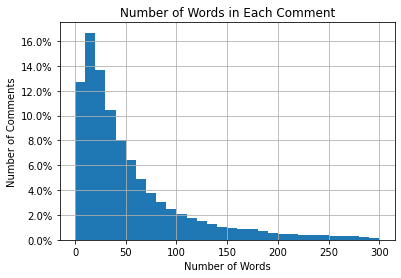

count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: num_words, dtype: float64


In [12]:
graphBasedOnNumWords(data)

In [13]:
getFrequencyOfWords(data)

the     445987
to      288817
of      219334
and     207381
a       201817
I       183930
is      164639
you     157272
that    140545
in      130262
for      96010
it       92651
on       84453
not      83944
"        81755
be       80928
this     71429
have     69414
as       68345
are      66277
dtype: int64


Percentage with tag toxic is 9.5844%
Percentage with tag severe_toxic is 0.9996%
Percentage with tag obscene is 5.2948%
Percentage with tag threat is 0.2996%
Percentage with tag insult is 4.9364%
Percentage with tag identity_hate is 0.8805%


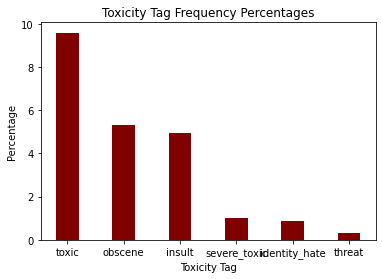

In [14]:
getFrequencyOfEachToxicTag(data)